## Classificação temática de preposições legislativas


## Importação de classes

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# um classificador linear que utiliza o Gradiente Descendente Estocástico como método de treino. Por padrão, utiliza o estimador SVM.
from sklearn.linear_model import SGDClassifier
# Uma rede neural Perceptron Multicamadas
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
DIR_DATASET = r'C:\Users\Daniel.Vale\Personal\PBDDC\TCC\Projeto\datasets\\'
ARQUIVO_PROPOSICOES = f'{DIR_DATASET}\\proposicoes.csv'
ARQUIVO_TEMAS = f'{DIR_DATASET}\\temas.csv'

In [61]:
colunasPreposicoes = ['id','uri','ementa']
colunasTemas = ['uriProposicao','siglaTipo','codTema','tema']

dfPreposicoes = pd.read_csv(ARQUIVO_PROPOSICOES, sep='|', low_memory=False,usecols=colunasPreposicoes)
dfTemas = pd.read_csv(ARQUIVO_TEMAS, sep='|', low_memory=False,usecols=colunasTemas)


In [62]:
print(dfPreposicoes.describe())


                 id
count  1.084210e+05
mean   2.252992e+06
std    4.199609e+04
min    3.088800e+05
25%    2.222554e+06
50%    2.253213e+06
75%    2.284692e+06
max    2.314638e+06


In [63]:
print(dfTemas.describe())

            codTema
count  48800.000000
mean      52.033484
std       11.475863
min       34.000000
25%       43.000000
50%       54.000000
75%       58.000000
max       86.000000


In [64]:
  dfPreposicoesTemas = pd.merge(dfTemas,dfPreposicoes,left_on='uriProposicao',right_on='uri')
  print(dfPreposicoesTemas.describe())

            codTema            id
count  48800.000000  4.880000e+04
mean      52.033484  2.251880e+06
std       11.475863  4.833521e+04
min       34.000000  3.088800e+05
25%       43.000000  2.229377e+06
50%       54.000000  2.255628e+06
75%       58.000000  2.275685e+06
max       86.000000  2.314621e+06


In [65]:
dfClassificacao = dfPreposicoesTemas[['ementa','tema']]
print(dfClassificacao.describe())

                                                   ementa   tema
count                                               48800  48800
unique                                              26488     32
top     Altera a Lei nº 14.124, de 10 de março de 2021...  Saúde
freq                                                   16   6178


In [66]:
print(pd.unique(dfClassificacao['tema']))

['Processo Legislativo e Atuação Parlamentar'
 'Relações Internacionais e Comércio Exterior' 'Educação'
 'Arte, Cultura e Religião' 'Administração Pública'
 'Finanças Públicas e Orçamento' 'Previdência e Assistência Social'
 'Saúde' 'Turismo' 'Defesa e Segurança' 'Direito e Defesa do Consumidor'
 'Indústria, Comércio e Serviços' 'Energia, Recursos Hídricos e Minerais'
 'Cidades e Desenvolvimento Urbano' 'Viação, Transporte e Mobilidade'
 'Economia' 'Meio Ambiente e Desenvolvimento Sustentável'
 'Ciência, Tecnologia e Inovação' 'Direito Penal e Processual Penal'
 'Direitos Humanos e Minorias' 'Comunicações' 'Direito e Justiça'
 'Trabalho e Emprego' 'Política, Partidos e Eleições'
 'Agricultura, Pecuária, Pesca e Extrativismo' 'Estrutura Fundiária'
 'Esporte e Lazer' 'Homenagens e Datas Comemorativas'
 'Direito Civil e Processual Civil' 'Direito Constitucional'
 'Ciências Sociais e Humanas' 'Ciências Exatas e da Terra']


In [73]:
ementas = dfPreposicoesTemas['ementa'].values
temas = dfPreposicoesTemas['tema'].values

ementas_treino, ementas_teste, temas_treino, temas_test = train_test_split(ementas, temas, test_size=0.25)

classificador = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

#classificador = MLPClassifier(max_iter=100, random_state=1, verbose=True)


print(classificador)


SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)


In [74]:
vetorizador = TfidfVectorizer()
vetor_ementas_treino = vetorizador.fit_transform(ementas_treino)

classificador.fit(vetor_ementas_treino, temas_treino)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [75]:
vetor_ementas_teste = vetorizador.transform(ementas_teste)
predicao = classificador.predict(vetor_ementas_teste)

print(metrics.classification_report(temas_test, predicao, target_names=pd.unique(temas), labels=pd.unique(temas)))

                                             precision    recall  f1-score   support

 Processo Legislativo e Atuação Parlamentar       0.48      0.46      0.47       117
Relações Internacionais e Comércio Exterior       0.42      0.35      0.38       157
                                   Educação       0.51      0.76      0.61       652
                   Arte, Cultura e Religião       0.30      0.24      0.26       144
                      Administração Pública       0.33      0.25      0.29      1216
              Finanças Públicas e Orçamento       0.28      0.17      0.21      1060
           Previdência e Assistência Social       0.30      0.21      0.25       358
                                      Saúde       0.43      0.57      0.49      1537
                                    Turismo       0.25      0.38      0.30        48
                         Defesa e Segurança       0.40      0.35      0.37       475
             Direito e Defesa do Consumidor       0.24      0.21

In [70]:
matriz_confusao = metrics.confusion_matrix(temas_test, predicao)
print(matriz_confusao)

[[355  21  22 ...  40   3  57]
 [ 11 112   2 ...   7   0   6]
 [ 25   1  54 ...  10   2   4]
 ...
 [ 58   3   5 ... 283   1  27]
 [  4   2   2 ...   4  15   3]
 [ 24   2   1 ...  11   3 363]]


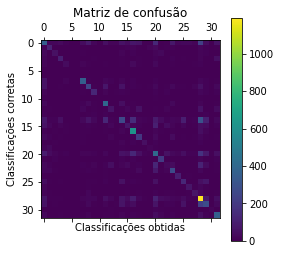

In [71]:
plt.matshow(matriz_confusao)
plt.title("Matriz de confusão")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

In [78]:
tn, fp, fn, tp = matriz_confusao.ravel()
print(metrics.accuracy_score(temas_test, predicao))

ValueError: too many values to unpack (expected 4)